# About Dataset
## Context
#### The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.
#### High-capacity electrical generating power plants and the grid concept, i.e., synchronized electrical power plants and geographical d displaced grids, required fault detection and operation of protection equipment in minimum possible time to remain stable. The faults on electrical power system transmission lines are supposed to be first detected and classified correctly and should be cleared in the least possible time. The protection system used for a transmission line can also initiate the other relays to protect the power system from outages. An exemplary fault detection system provides a practical, reliable, fast, and secure way of a relaying operation. The application of pattern recognition technology could help discriminate against faulty and healthy electrical power systems. It also enables us to differentiate among three phases of a three-phase power system experiencing a fault.

## Content
#### We have modeled a power system in MATLAB to simulate fault analysis. The power system consists of 4 generators of 11 × 10^3 V, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line.

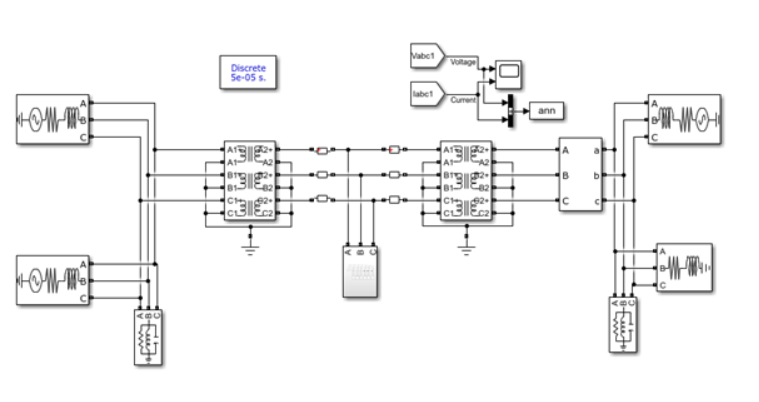

#### We simulate the circuit under normal conditions as well as under various fault conditions. We then collect and save the measured Line Voltages and Line Currents at the output side of the power system. We collected nearly 12000 data points, and then the data is labeled.

#### Link of the Dataset:  https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification/data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [83]:
df = pd.read_csv("detect_dataset.csv")

In [84]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [85]:
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [86]:
df.drop('Unnamed: 7', axis=1, inplace=True)
df.drop('Unnamed: 8', axis=1, inplace=True)

In [87]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [115]:
df.tail()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690
12000,0,-64.598401,34.480799,27.250065,0.131669,-0.563835,0.432166


In [88]:
df.isnull().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

In [89]:
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [90]:
x = df.drop('Output (S)', axis=1)
y = df['Output (S)']

In [91]:
x

,Ia,Ib,Ic,Va,Vb,Vc
0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...
11996,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [92]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: Output (S), Length: 12001, dtype: int64

In [93]:
y.value_counts()

Output (S)
0    6505
1    5496
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9600, 6), (2401, 6))

In [97]:
X_train

,Ia,Ib,Ic,Va,Vb,Vc
10073,-7.222959,-19.640627,23.413718,0.581059,-0.372676,-0.208383
10812,-59.289737,26.185750,29.889639,0.237953,-0.583196,0.345243
6429,-44.663045,-5.931726,52.801656,0.380453,-0.588035,0.207582
288,-16.682827,61.338561,-44.655734,-0.605130,0.275769,0.329361
2627,-155.236458,-689.928297,-57.686162,-0.039882,0.288285,-0.248404
...,...,...,...,...,...,...
11964,-70.679264,67.811236,-0.009447,-0.206149,-0.382249,0.588398
5191,-66.722584,585.878437,-516.748674,-0.204746,-0.030581,0.235327
5390,54.209175,-568.911763,517.219031,0.205024,0.031069,-0.236093
860,-263.720676,-61.147852,47.062209,0.378421,-0.479244,0.100823


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [107]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7324
- F1 score: 0.7038
- Precision: 1.0000
- Recall: 0.4163
- Roc Auc Score: 0.7081
----------------------------------
Model performance for Test set
- Accuracy: 0.7372
- F1 score: 0.7096
- Precision: 1.0000
- Recall: 0.4237
- Roc Auc Score: 0.7119


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9954
- F1 score: 0.9954
- Precision: 0.9936
- Recall: 0.9963
- Roc Auc Score: 0.9955


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9979
- F1 score: 0.9979
- Precision: 0.9964
- Recall: 0.9991
- Roc Auc Score: 0.9980


Gradient Boost
Model performance for Training se

In [ ]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [109]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params)
                   
                   ]

In [110]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': None}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [112]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=200,min_samples_split=8,
                                          max_features=5,max_depth=None),
    "Xgboost":XGBClassifier(n_estimators=200,max_depth=30,learning_rate=0.1,
                           colsample_bytree=0.5)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 0.9977
- Recall: 1.0000
- Roc Auc Score: 0.9990
----------------------------------
Model performance for Test set
- Accuracy: 0.9979
- F1 score: 0.9979
- Precision: 0.9964
- Recall: 0.9991
- Roc Auc Score: 0.9980


Xgboost
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9991
- Recall: 1.0000
- Roc Auc Score: 0.9996
----------------------------------
Model performance for Test set
- Accuracy: 0.9975
- F1 score: 0.9975
- Precision: 0.9964
- Recall: 0.9982
- Roc Auc Score: 0.9976




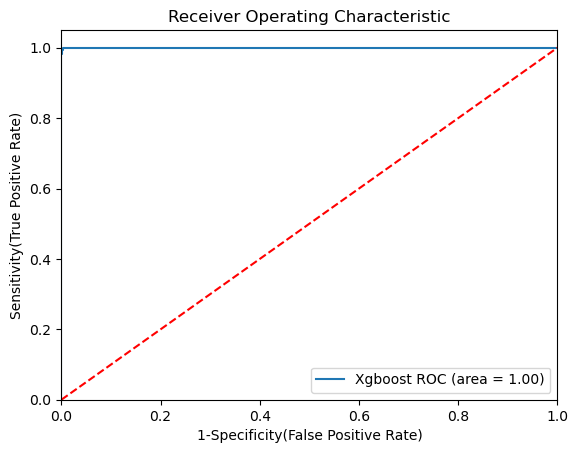

In [113]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=200,max_depth=30,learning_rate=0.1,
                           colsample_bytree=0.5),
    'auc':  0.9976
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

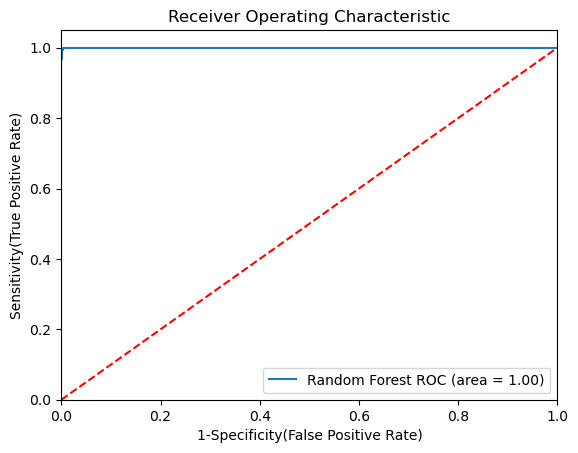

In [114]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest',
    'model':RandomForestClassifier(n_estimators=200,min_samples_split=8,
                                          max_features=5,max_depth=None),
    'auc':  0.9980
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [ ]:
x_prediction = [[-707.9230469,-25.07463886,-19.80356029,-0.096324063,0.427897895,-0.331573832],
                [2.933111683,-56.33908943,53.40597775,0.597301535,-0.386824284,-0.210477251]]

for model_name, model in models.items():
    print(f"\n{model_name} Predictions:")
    for i, x in enumerate(x_prediction):
        prediction = model.predict([x]) 
        print(f"  Prediction for x_prediction[{i}]: {prediction}")


Random Forest Predictions:
  Prediction for x_prediction[0]: [1]
  Prediction for x_prediction[1]: [0]

Xgboost Predictions:
  Prediction for x_prediction[0]: [1]
  Prediction for x_prediction[1]: [0]
